In [2]:
print("Hare Krishna")

Hare Krishna


# Predicting heart disease Using Machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model to predict wheather not someone has heart disease using there medical records

# Steps :-
1. Problem defination
2. Data
3. Evaluating
4. Features
5. modelling
6. Experimentation

## 1.Problem defination

in a statement,
> Given medical records can we predict they have heart disease or not

## 2.Data Came from Kaggle FYI it's a great place for datasets

## 3.Evaluation(what defines our success)

> if we can reach 95% accuracy in predicting heart-disease then we'll pursue it for industrial level

## 4.Features

**Creating data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Preparing ML Tools

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.tree import plot_tree

# Data Exploration(Exploratory data analysis or EDA)

the goal is to find out more about the data and dataset to become a subject matter expert in the dataset in which I am working on.

1. what is the problem are we trying to solve.
2. what kind of data we have and to treat them string,object,int,etc howdo we treat them.
3. what is missing and how to treat them.
4. what are the outliners(the sample values that are too far away from normal sample values) and why i would care about them.
5. how can we add,change or remove features to get clarity on our data.

In [4]:
df=pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

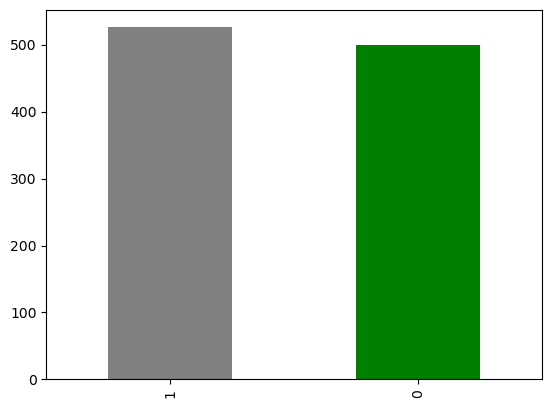

In [8]:
df["target"].value_counts().plot(kind="bar",color=["grey","green"])

In [9]:
df.chol.value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64

# compare target column with chol column

In [10]:
pd.crosstab(df.chol,df.target)

target,0,1
chol,,
126,0,3
131,3,0
141,0,3
149,4,4
157,0,4
...,...,...
394,0,3
407,4,0
409,3,0


# compare sex with target

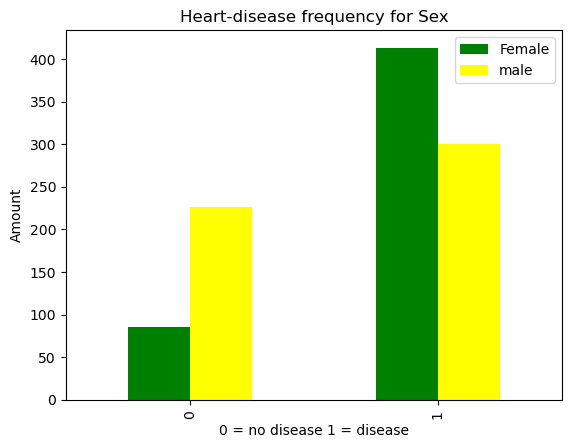

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",color=["green","yellow"])
plt.title("Heart-disease frequency for Sex")
plt.xlabel("0 = no disease 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])

## we are trying to be subject matter expert on the Data

# trying to find pattern with age thalach

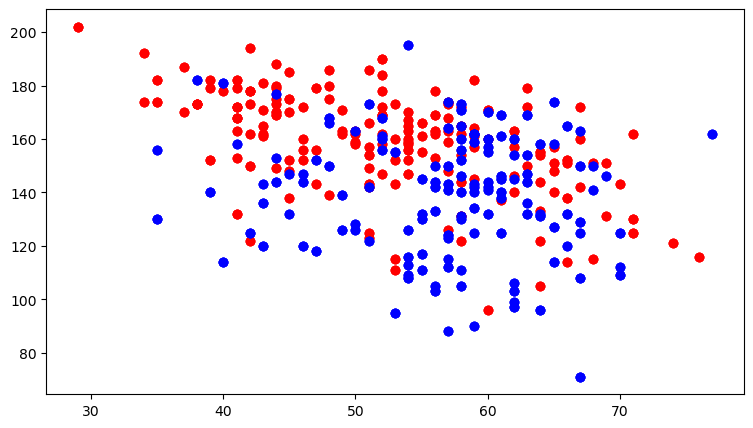

In [12]:
plt.figure(figsize=(9,5))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")

<AxesSubplot:ylabel='Frequency'>

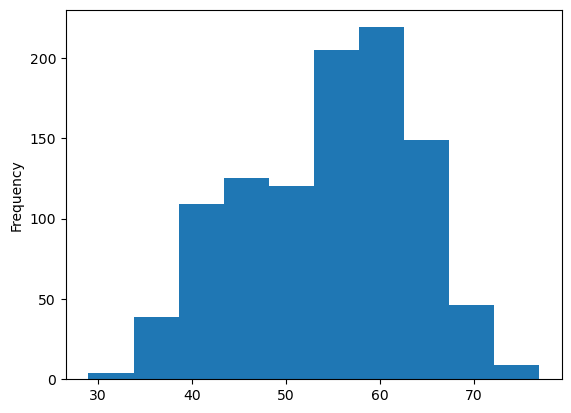

In [13]:
df.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

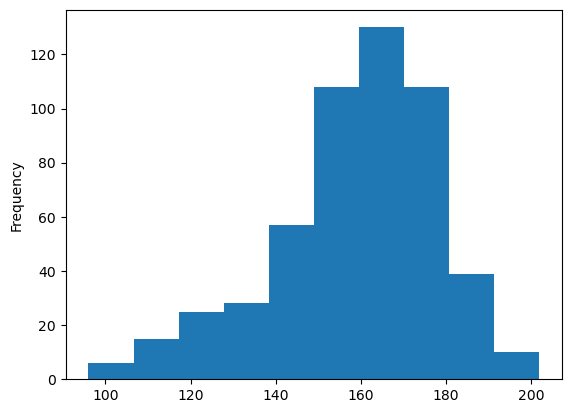

In [14]:
df.thalach[df.target==1].plot.hist()

<AxesSubplot:xlabel='cp'>

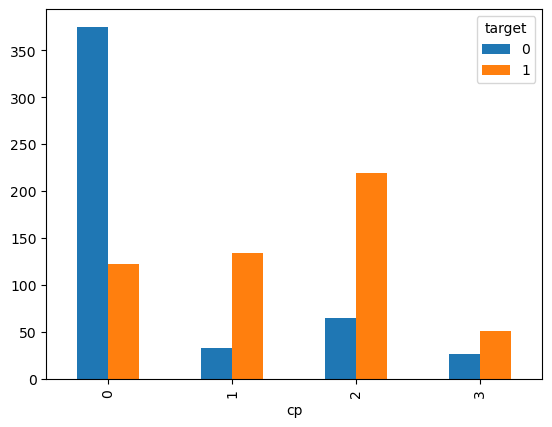

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar")

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


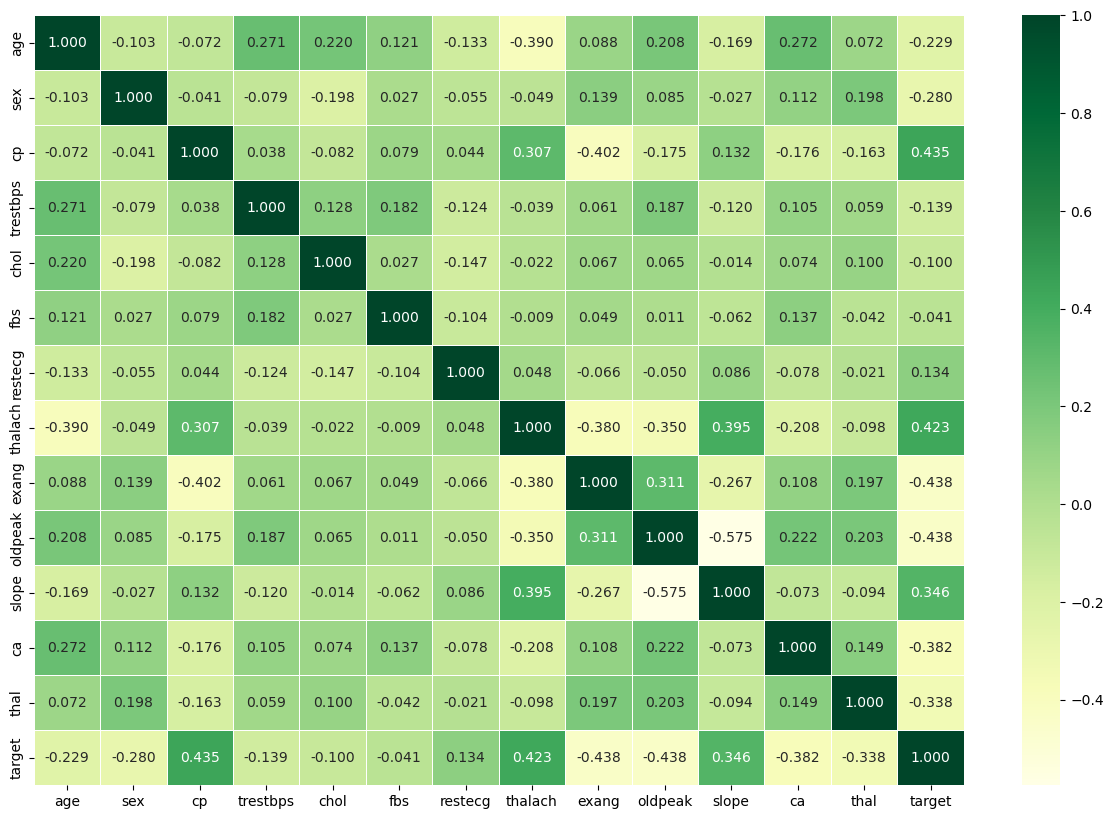

In [17]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".3f",cmap="YlGn")

# 5.Modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
X=df.drop("target",axis=1)

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [21]:
Y=df["target"]

In [22]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [23]:
np.random.seed(77)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

data is ready after splitting it into training and test model

3 models that we are gonna try:-
  * logisticRegression
  * K-nearest Neighbour
  * RandomForest

In [24]:
model_dict={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier()
}

In [25]:
def eva(dict_mo,X_train,X_test,Y_train,Y_test):
    '''
    fits the model_dicts models with the training data sent and scores them with the testing data sent 
    '''
    model_score={}
    np.random.seed(28)
    for name,model in dict_mo.items():
        #fitting the models
        model.fit(X_train,Y_train)
        #Scoring with the model
        model_score[name]=model.score(X_test,Y_test)
        
    return model_score

In [26]:
model_score=eva(model_dict,X_train,X_test,Y_train,Y_test)
model_score

C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8341463414634146,
 'KNN': 0.7609756097560976,
 'RandomForest': 0.9853658536585366}

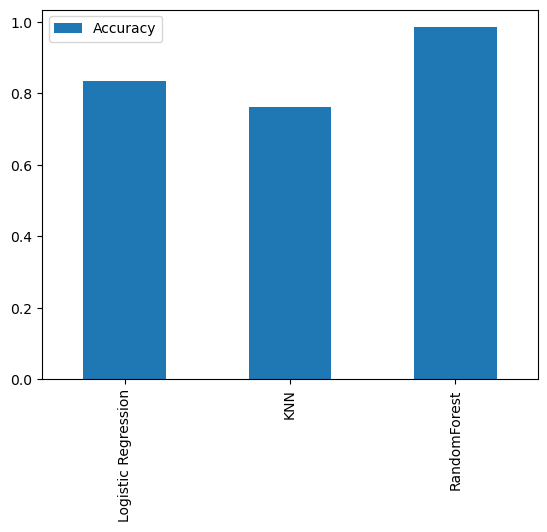

In [27]:
model_compare=pd.DataFrame(model_score,index=["Accuracy"])
model_compare.T.plot.bar();

now we are looking at the baseline prediction of the model and 
our end estimation cannot be based on our first prediction 

now it is time to tune our model to check there best possible predictions

Let's briefly go through each before we see them in action.

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### evaluating knn hyperparamet to see if it's it's pergformance can improve and can be on par with randomforest or logistic regression

In [28]:
train_score=[]
test_score=[]

knn=KNeighborsClassifier()

num=range(1,21)
np.random.seed(11)
knn.fit(X_train,Y_train)
    
for i in num:
    knn.set_params(n_neighbors=i)
    
    train_score.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))


In [29]:
train_score

[1.0,
 0.998780487804878,
 0.9939024390243902,
 0.9426829268292682,
 0.9329268292682927,
 0.8390243902439024,
 0.8060975609756098,
 0.7914634146341464,
 0.7719512195121951,
 0.7597560975609756,
 0.7548780487804878,
 0.7719512195121951,
 0.7695121951219512,
 0.7536585365853659,
 0.7707317073170732,
 0.774390243902439,
 0.7585365853658537,
 0.7560975609756098,
 0.75,
 0.7475609756097561]

In [30]:
test_score

[0.9560975609756097,
 0.9463414634146341,
 0.9073170731707317,
 0.8,
 0.7609756097560976,
 0.7560975609756098,
 0.7414634146341463,
 0.7219512195121951,
 0.751219512195122,
 0.7268292682926829,
 0.7073170731707317,
 0.7317073170731707,
 0.7365853658536585,
 0.7268292682926829,
 0.7658536585365854,
 0.7560975609756098,
 0.7317073170731707,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585]

Max KNN score is :95.609756%


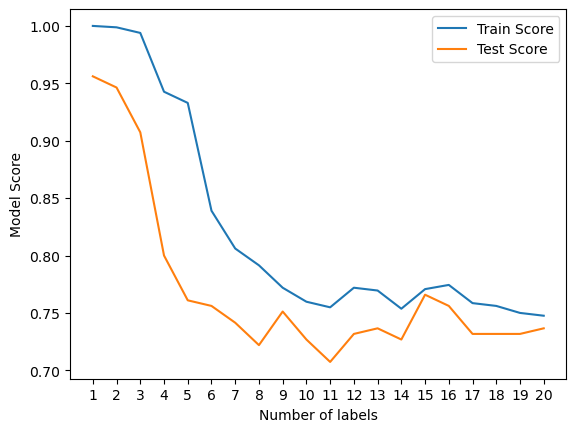

In [31]:
plt.plot(num,train_score,label="Train Score")
plt.plot(num,test_score,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of labels")
plt.ylabel("Model Score")
plt.legend()

print(f"Max KNN score is :{max(test_score)*100:2f}%")


# HyperParameter tuning using RandomizedSearchCV

In [32]:
#for logisdtic regression
logrg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

#for random forest
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,10,2),
    "min_samples_leaf":np.arange(1,20,2)
}


In [34]:
#hyper tuning our logistic regression
np.random.seed(77)

log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=logrg_grid,cv=10,n_iter=20,verbose=True)

log_reg.fit(X_train,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [36]:
log_reg.score(X_test,Y_test)

0.8292682926829268

In [33]:
 #hyper tuning our randomforest
np.random.seed(77)

rf_reg=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=10,n_iter=10,verbose=True)

rf_reg.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rf_reg.best_params_

{'n_estimators': 360,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': None}

In [35]:
rf_reg.score(X_test,Y_test)

0.9560975609756097

In [41]:
# Since Both KNN and RandomForest have almost the same result lets try to hyper tune KNN and see
knn_grid={
    "leaf_size":list(range(1,50)),
    "n_neighbors" : list(range(1,30)),
    "p":[1,2]
}

np.random.seed(77)

knn_ran=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=knn_grid,cv=10,n_iter=10,verbose=True)

knn_ran.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   verbose=True)

In [42]:
knn_ran.score(X_test,Y_test)

0.7609756097560976

## KNN after hyper tuning does'nt give above 95% result so along with logistic regression we will drop it.

# since randomforest is able to give closest to the accuracy we need let's hyper tune it using gridSearchCV

In [ ]:
np.random.seed(77)

rf_reg_fin=GridSearchCV(RandomForestClassifier(),rf_grid,cv=10)

rf_reg_fin.fit(X_train,Y_train)

In [ ]:
rf_reg.score(X_test,Y_test)

In [ ]:
# now making comparision and evaluating the trained model

In [36]:
y_preds=rf_reg.predict(X_test)

In [37]:
y_preds

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0], dtype=int64)

C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


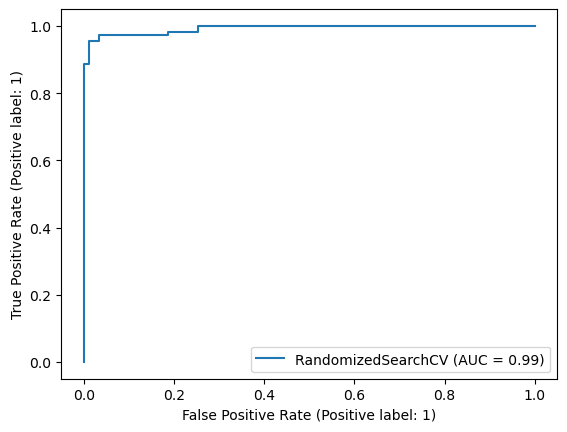

In [39]:
# roc
plot_roc_curve(rf_reg,X_test,Y_test)

In [44]:
# confusion matrix
print(confusion_matrix(Y_test,y_preds))

[[ 90   1]
 [  8 106]]


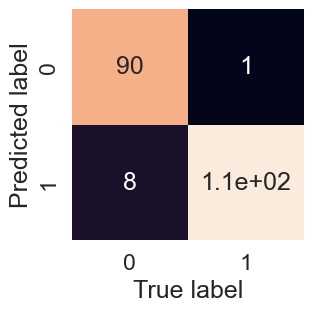

In [45]:
sns.set(font_scale=1.5)

def plot(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot(Y_test,y_preds)

In [46]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        91
           1       0.99      0.93      0.96       114

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [47]:
# creating a model using the best params found during the hyper parameter tuning process

In [48]:
rf_reg.best_params_

{'n_estimators': 360,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': None}

In [49]:
clf=RandomForestClassifier(n_estimators=360,min_samples_split=2,min_samples_leaf=5,max_depth=None)

In [79]:
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc.mean()
cv_acc=cv_acc.mean()

In [80]:
cv_acc.mean()

0.953170731707317

In [81]:
cv_acc

0.953170731707317

In [82]:
cv_pre=cross_val_score(clf,X,Y,cv=10,scoring="precision")
cv_pre=cv_pre.mean()

In [83]:
cv_recall=cross_val_score(clf,X,Y,cv=10,scoring="recall")
cv_recall=cv_recall.mean()

In [84]:
cv_f1=cross_val_score(clf,X,Y,cv=10,scoring="f1")
cv_f1=cv_f1.mean()

<AxesSubplot:title={'center':'Cross-validated matrices'}>

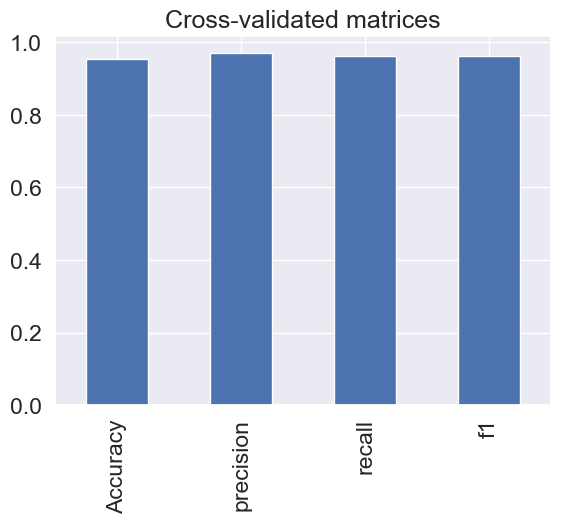

In [88]:
cv=pd.DataFrame({
    "Accuracy":cv_acc,
    "precision":cv_pre,
    "recall":cv_recall,
    "f1":cv_f1,
},index=[0])
cv.T.plot.bar(title="Cross-validated matrices",legend=False)

### Feature Importance

In [89]:
clf

RandomForestClassifier(min_samples_leaf=5, n_estimators=360)

In [90]:
clf.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=360)

In [94]:
clf.estimators_[0].feature_importances_

array([0.23869281, 0.05959851, 0.00408199, 0.05210503, 0.06958618,
       0.        , 0.00109792, 0.01882547, 0.01424599, 0.00847702,
       0.10883679, 0.10160957, 0.32284271])

In [95]:
clf.estimators_[1].feature_importances_

array([0.01366967, 0.00670252, 0.16322162, 0.05948372, 0.0309302 ,
       0.01313244, 0.        , 0.04127085, 0.03023251, 0.13148355,
       0.15166507, 0.35386047, 0.00434738])

In [96]:
clf.feature_importances_

array([0.08447435, 0.03208488, 0.15162545, 0.04983265, 0.05483772,
       0.0062144 , 0.01455831, 0.10508584, 0.05994437, 0.12747499,
       0.06380658, 0.11906504, 0.13099544])

In [97]:
feature_dict=dict(zip(df.columns,list(clf.feature_importances_)))

In [98]:
feature_dict

{'age': 0.08447435054990667,
 'sex': 0.03208487864730006,
 'cp': 0.1516254509851271,
 'trestbps': 0.04983264815068714,
 'chol': 0.054837716094363206,
 'fbs': 0.006214395778991456,
 'restecg': 0.01455830816859188,
 'thalach': 0.10508583706968055,
 'exang': 0.05994436842865859,
 'oldpeak': 0.12747498622659875,
 'slope': 0.06380658043226979,
 'ca': 0.11906504327502551,
 'thal': 0.13099543619279932}

<AxesSubplot:title={'center':'Feature importance'}>

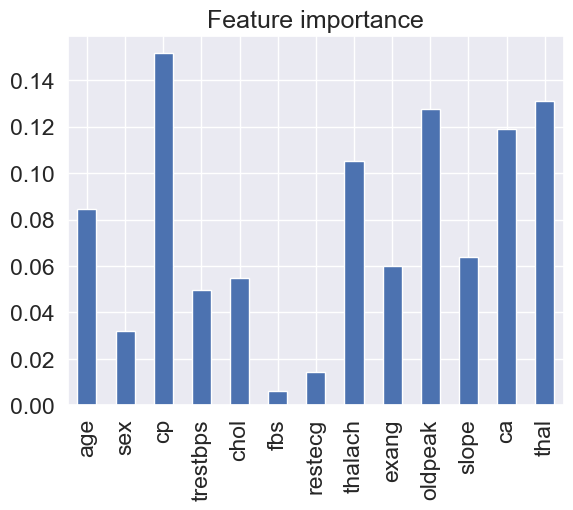

In [101]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)

In [105]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


# Experimentation

A good next step would be to discuss with your team or research on your own different options of going forward.

* Could you collect more data?

* Could you try a better model? If you're working with structured data, you might want to look into [CatBoost](https://catboost.ai/) or [XGBoost](https://xgboost.ai/).

* Could you improve the current models (beyond what we've done so far)?
* If your model is good enough, how would you export it and share it with others? (Hint: check out [Scikit-Learn's documentation on model persistance](https://scikit-learn.org/stable/modules/model_persistence.html))

In [ ]:
# exporting th emodel that is ready
import pickle
pickle dump(clf,open("heart_"))